<a href="https://colab.research.google.com/github/Hariom-Gupta/program/blob/master/WiproMovingAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Moving Average ***


‘Average’ is easily one of the most common things we use in our day-to-day lives. For instance, calculating the average marks to determine overall performance, or finding the average temperature of the past few days to get an idea about today’s temperature – these all are routine tasks we do on a regular basis. So this is a good starting point to use on our dataset for making predictions.

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. Here is a simple figure that will help you understand this with more clarity.

In [3]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_Testing/data_moving_average.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)





         Date    Open    High     Low   Close
0  2019-12-31  247.70  248.60  245.30  245.80
1  2019-12-30  248.45  249.55  246.60  248.95
2  2019-12-27  250.00  250.75  246.35  247.55
3  2019-12-26  252.00  252.40  249.55  250.30
4  2019-12-24  253.00  253.95  251.10  252.25

 Shape of the data:
(1235, 5)

 Shape of training set:
(987, 2)

 Shape of validation set:
(248, 2)

 RMSE value on validation set:
48.14248001130685


Let’s visualize this to get a more intuitive understanding. So here is a plot of the predicted values along with the actual values.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


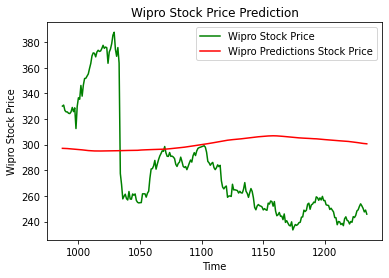

In [6]:
import os
import matplotlib.pyplot as plt
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
#plt.plot(train['Close'], color = 'black', label = 'Infy Stock Price')
plt.plot(valid['Close'], color = 'green', label = 'Wipro Stock Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Wipro Predictions Stock Price')
plt.title('Wipro Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Wipro Stock Price')
plt.legend()
plt.show()
#plt.savefig(os.path.join("/content/drive/My Drive/Colab Notebooks/ML_Testing/", 'moving_average'+str(BATCH_SIZE)+'.jpg'))